# Diamond Price Prediction (Analysis & Visualization) 

In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
diamonds = pd.read_csv("Downloads/DiamondPrices.csv")

In [7]:
diamonds.head()


,sn,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sn       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
diamonds["color"].value_counts()


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
diamonds["clarity"].value_counts()


SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
diamonds.describe()

,sn,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Plotting Histogram to get an idea about the different features/attributes of the dataset

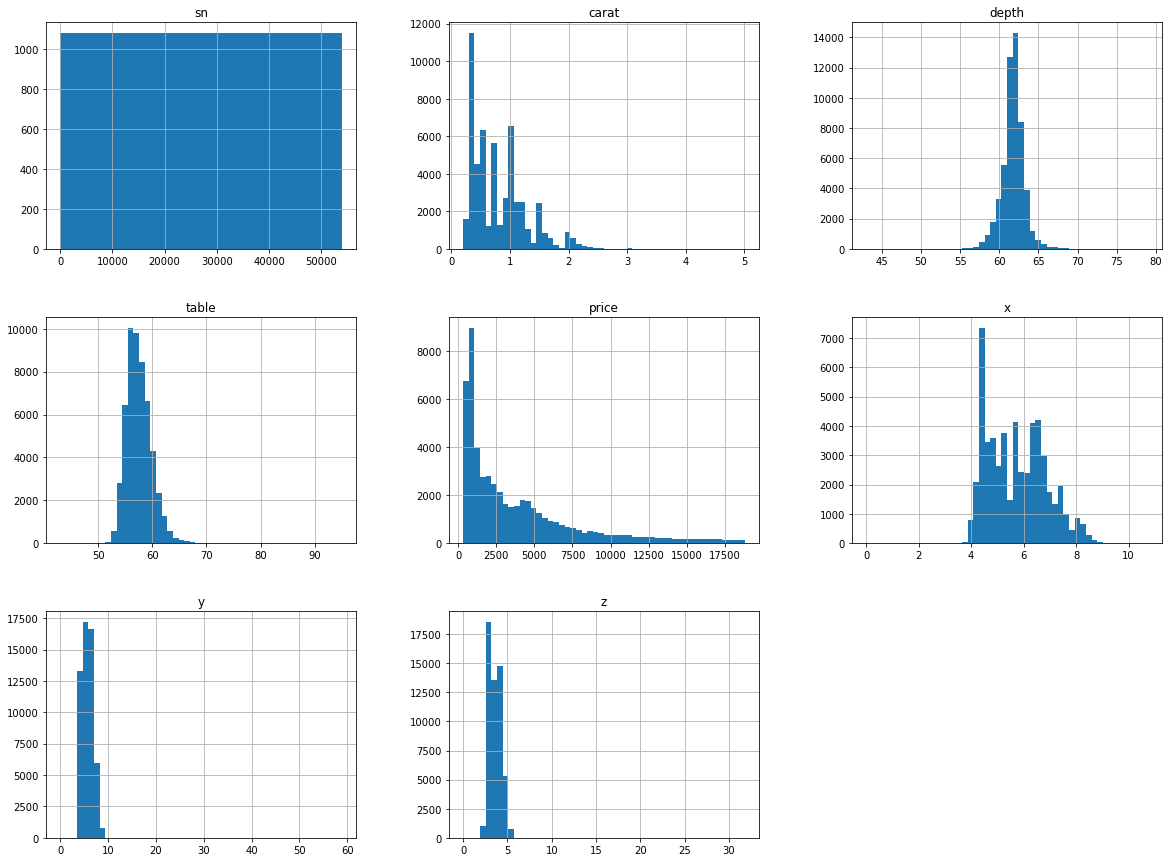

In [14]:
diamonds.hist(bins = 50, figsize = (20,15))
plt.show()

# Exploring Correlation between Features

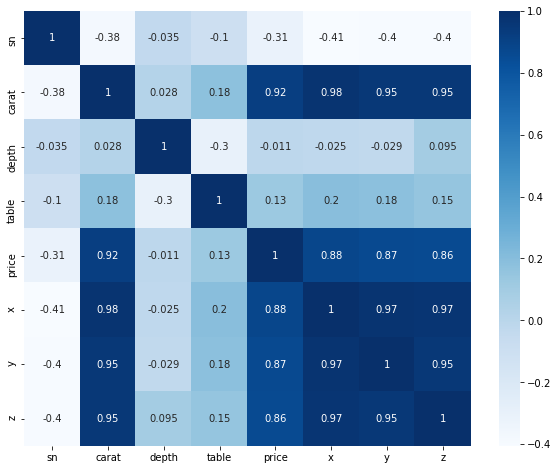

In [15]:
corr_matrix = diamonds.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")

plt.show()

# Conclusions
## -> x , y and z are correlated with the price.
## -> Price of the diamond and carat weight of the diamond are highly correlated
## -> Depth and Table are weakly correlated with the price of the diamond.
## -> Carat is one of the main features to predict the price of a diamond.

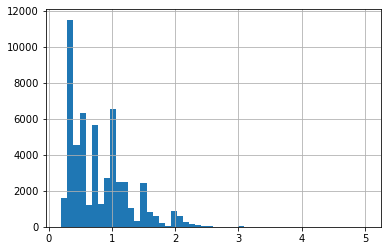

In [16]:
diamonds["carat"].hist(bins = 50)
plt.show()

In [17]:
diamonds["carat"].max()

5.01

In [18]:
diamonds["carat"].min()


0.2

In [19]:
#Most of the carat value ranges from 0.3 to 1.2. So, we will divide the carat into 5 categories.

In [20]:
# Divide by 0.4 to limit the number of carat strata

diamonds["carat_cat"] = np.ceil(diamonds["carat"]/0.4)

# Label those above 5 as 5
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

In [21]:
diamonds["carat_cat"].value_counts()


2.0    17020
1.0    14391
3.0    13374
4.0     5907
5.0     3248
Name: carat_cat, dtype: int64

<AxesSubplot:>

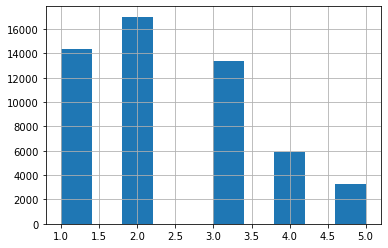

In [22]:
diamonds["carat_cat"].hist()


In [23]:
#Now we will perform the stratified splitting of the dataset using sklearn's StratifiedShuffleSplit class

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(diamonds,diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [25]:
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)


2.0    0.315536
1.0    0.266778
3.0    0.247961
4.0    0.109473
5.0    0.060252
Name: carat_cat, dtype: float64

In [26]:
#We will now drop the carat category columns.



In [27]:
for x in (strat_test_set, strat_train_set):
    x.drop("carat_cat", axis=1,inplace = True)

In [28]:
strat_test_set.describe()
#Size of Test Set = 10788

,sn,carat,depth,table,price,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,27032.795050,0.797741,61.729329,57.480580,3956.750649,5.730093,5.734634,3.536117
std,15509.137105,0.474259,1.430505,2.242666,4045.204490,1.123129,1.142879,0.697210
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13586.500000,0.400000,61.000000,56.000000,954.000000,4.710000,4.720000,2.910000
50%,27182.000000,0.700000,61.800000,57.000000,2395.500000,5.700000,5.710000,3.530000
75%,40428.750000,1.040000,62.500000,59.000000,5348.000000,6.530000,6.530000,4.030000
max,53937.000000,5.010000,71.800000,73.000000,18804.000000,10.740000,31.800000,6.980000


In [29]:
strat_train_set.describe()


#Size of Train Set = 43152

,sn,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,26954.926237,0.797989,61.754424,57.451335,3926.811990,5.731423,5.734499,3.539388
std,15586.918650,0.473955,1.433123,2.232430,3975.401149,1.121431,1.141962,0.707812
min,1.000000,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,13459.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26905.500000,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.520000
75%,40466.250000,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.040000
max,53940.000000,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,31.800000


# Data Visualisation

In [30]:
#We will be using training set to plot varoius graphs to visualise and draw conclusions from the data.

In [31]:
diamonds = strat_train_set.copy()


## Plotting scatterplot between price and carat

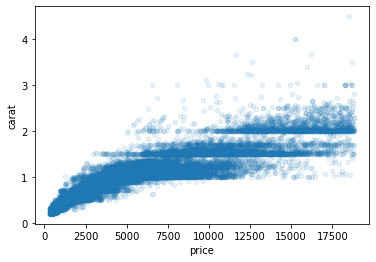

In [32]:
diamonds.plot(kind="scatter", x="price", y="carat",alpha = 0.1)
plt.show()

## Count plots of different categorical features of diamonds

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


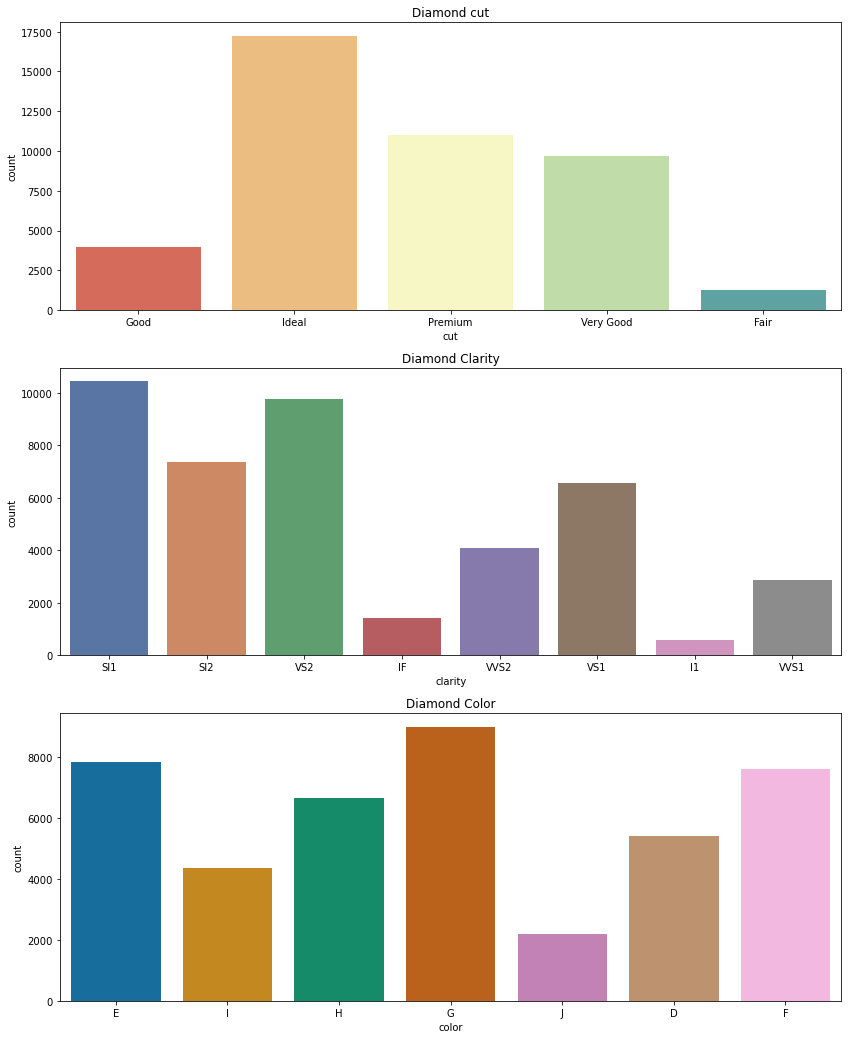

In [33]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.countplot('cut',data = diamonds, ax=ax[0],palette="Spectral")
sns.countplot('clarity',data = diamonds, ax=ax[1],palette="deep")
sns.countplot('color',data = diamonds, ax=ax[2],palette="colorblind")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
plt.show()

## Comparison of carat with price based on diamond cut.

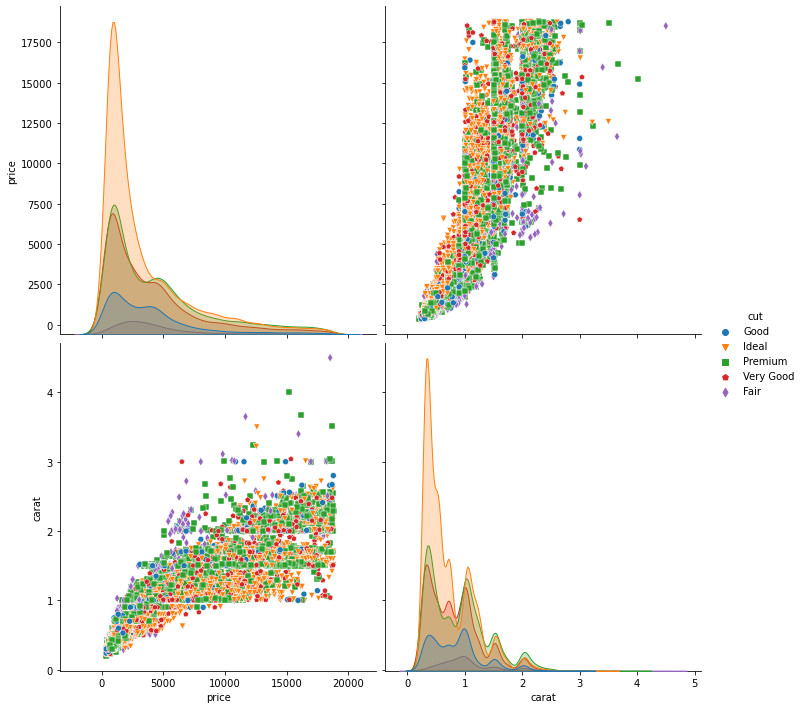

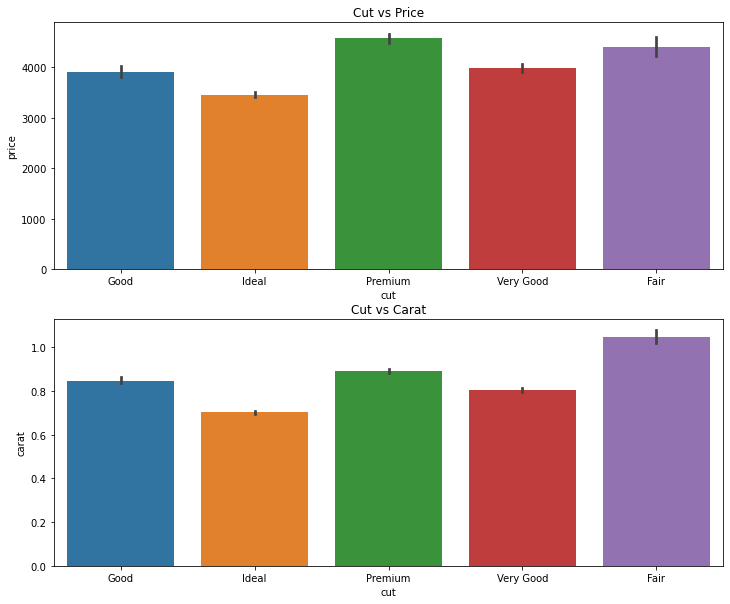

In [34]:
sns.pairplot(diamonds[["price","carat","cut"]], markers = ["o","v","s","p","d"],hue="cut", height=5)
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="cut",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="cut",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
plt.show()

### Conclusion

Fair cut diamonds weigh the most but are not the most expensive diamonds.
Premium cut diamonds are the most expensive diamonds.
Ideal cut diamonds weigh less and are cheapest diamonds.
We can see that price of diamond is dependent on the cut.

## Comparison of carat with price based on diamond color

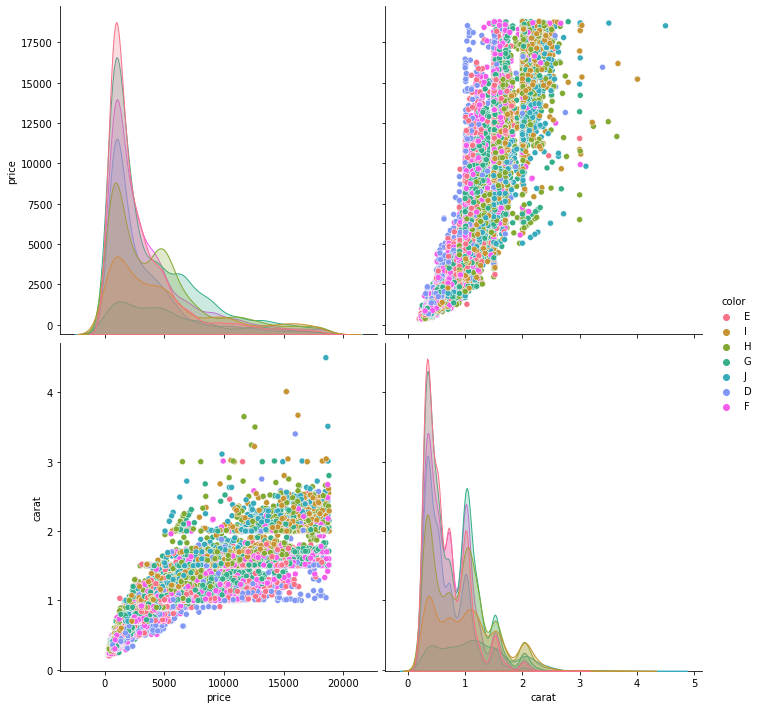

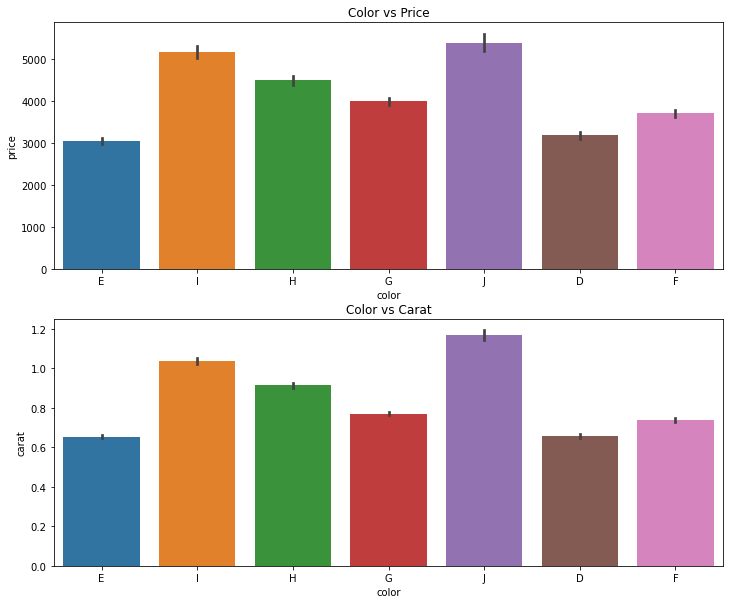

In [35]:
sns.pairplot(diamonds[["price","carat","color"]], hue="color", height=5, palette="husl")
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="color",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="color",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
plt.show()

### Conclusions

J color diamonds are the most expensive and the heaviest diamonds.
The two plots are very similar.
Thus, it can be concluded that the heavier diamond is expensive, if only color is considered.

## Comparison of carat with price based on diamond clarity

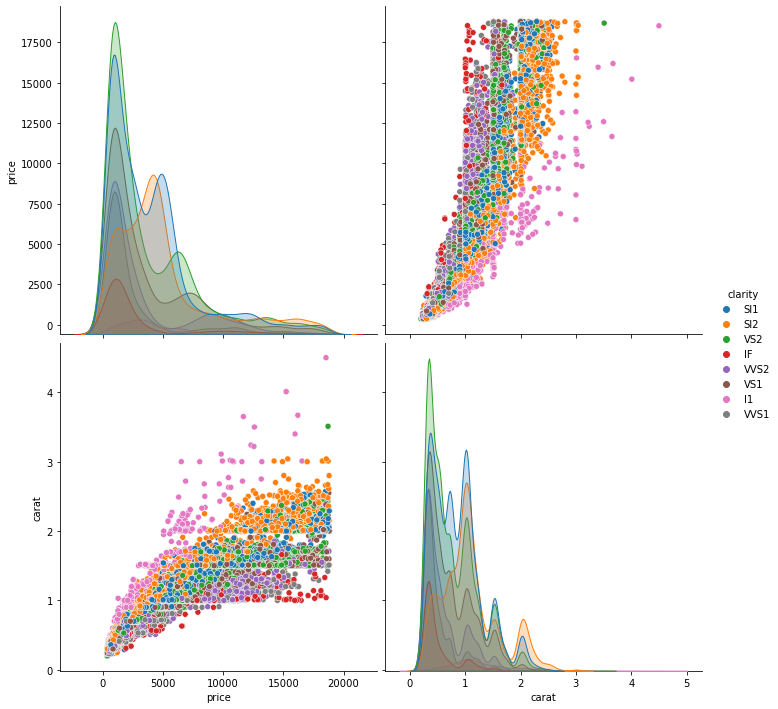

Text(0.5, 1.0, 'Clarity vs Carat')

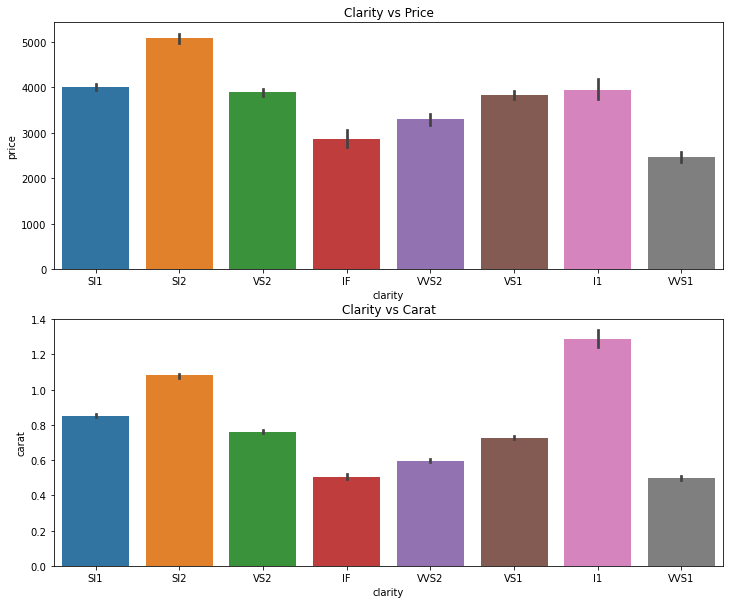

In [36]:
sns.pairplot(diamonds[["price","carat","clarity"]],hue="clarity", height=5)
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="clarity",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="clarity",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Clarity vs Price")
ax[1].set_title("Clarity vs Carat")
